# Pymaceuticals Inc.
---

### Background
You've just joined Pymaceuticals, Inc., a new pharmaceutical company that specializes in anti-cancer medications. Recently, it began screening for potential treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

As a senior data analyst at the company, you've been given access to the complete data from their most recent animal study. In this study, 249 mice who were identified with SCC tumors received treatment with a range of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.

The executive team has tasked you with generating all of the tables and figures needed for the technical report of the clinical study. They have also asked you for a top-level summary of the study results.

### Analysis

- There is a near equal number of male mice to female mice, limiting the influence of sex on the results.

- More mice were treated with Capomulin and Ramicane than any other drug; both yielded smaller tumors on average compared to other drug regimens by the end of the treatment timepoints. Relatedly, Mouse l509 (treated with Capomulin) saw a significant tumor volume decline over time.

- Overall, mouse weight and average tumor volume are strongly correlated (Pearson R: 0.84); this means the larger the mouse, the larger the tumor.

- It's recommended that equal numbers of mice are subjected to each treatment to increase robustness of results.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(study_results, mouse_metadata, on=['Mouse ID'])

# Display the data table for preview
mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
len(mouse_df["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = mouse_df.loc[mouse_df.duplicated(subset = ['Mouse ID', 'Timepoint']), "Mouse ID"].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df = mouse_df[mouse_df["Mouse ID"] == 'g989']
duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_df[mouse_df["Mouse ID"].isin(duplicate_mouse) == False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Use groupby to generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#drug_regimen = mouse_df.groupby("Drug Regimen")
tumor_mean = mouse_df.groupby('Drug Regimen').mean().reset_index()
tumor_median = mouse_df.groupby('Drug Regimen').median().reset_index()
tumor_var = mouse_df.groupby('Drug Regimen').var().reset_index()
tumor_std = mouse_df.groupby('Drug Regimen').std().reset_index()
tumor_sem = mouse_df.groupby('Drug Regimen').sem().reset_index()

# Assemble the resulting series into a single summary DataFrame.
col1 = tumor_mean[["Drug Regimen", "Tumor Volume (mm3)"]]
col2 = tumor_median[["Tumor Volume (mm3)"]]
col3 = tumor_var[["Tumor Volume (mm3)"]]
col4 = tumor_std[["Tumor Volume (mm3)"]]
col5 = tumor_sem[["Tumor Volume (mm3)"]]

summary_df = pd.concat([col1, col2, col3, col4, col5], axis=1)
summary_df.columns=["Drug Regimen",
                    "Mean Tumor Volume",
                    "Median Tumor Volume",
                    "Tumor Volume Variance",
                    "Tumor Volume Std. Dev.",
                    "Tumor Volume Std. Err."]

summary_df

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen = mouse_df.set_index(["Drug Regimen"])

# Using the aggregation method, produce the same summary statistics in a single line.
aggregation_df = mouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

aggregation_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

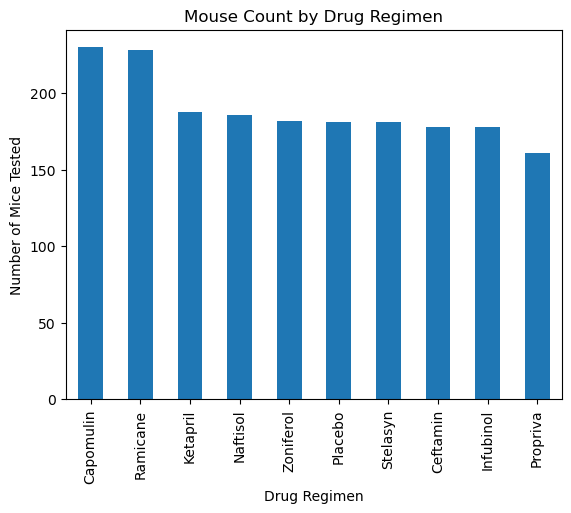

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mouse_count = mouse_df.value_counts(subset = "Drug Regimen")
mouse_count.plot.bar(title="Mouse Count by Drug Regimen", ylabel='Number of Mice Tested')
plt.show()

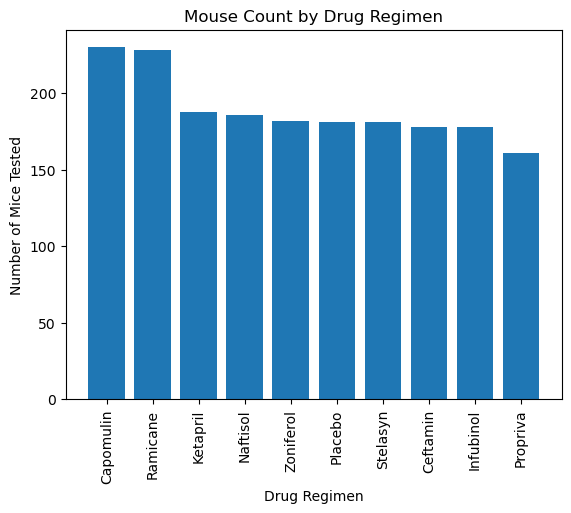

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
y_axis = mouse_count
x_axis = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Ceftamin", "Infubinol", "Propriva"]

plt.title("Mouse Count by Drug Regimen")
plt.bar(x_axis, y_axis)
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")
plt.xlabel("Drug Regimen")
plt.show()

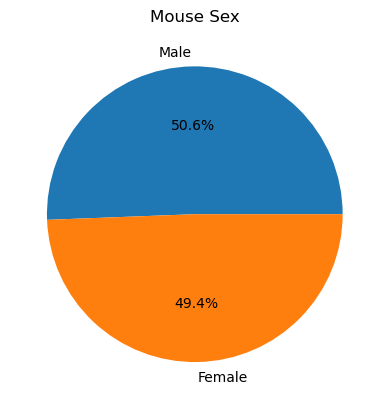

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = mouse_df.value_counts(subset="Sex")
sex_count.plot.pie(title="Mouse Sex", ylabel="", autopct="%1.1f%%")
plt.show()

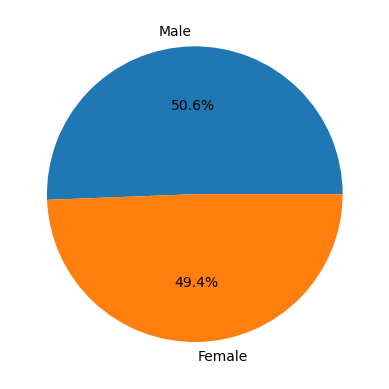

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male","Female"]
plt.pie(sex_count, labels=labels, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
fourdrugs_df = clean_df[clean_df["Drug Regimen"].str.contains("Ketapril|Naftisol|Zoniferol|Placebo|Stelasyn|Propriva") == False]
max_time = fourdrugs_df.groupby(["Mouse ID"])["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumorvol_df = max_time.merge(mouse_df, on = ["Mouse ID", "Timepoint"], how = "left")
tumorvol_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_vol= tumorvol_df.loc[tumorvol_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol.append(final_vol)
    
    # Calculate the IQR
    quartiles = final_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean = final_vol.mean()
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = final_vol.loc[(final_vol < lower_bound) | (final_vol > upper_bound)]

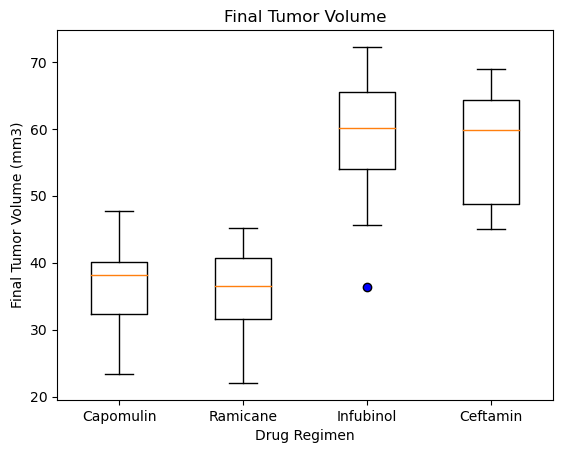

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol, labels = treatment, flierprops={"markerfacecolor":"b", "markersize":6})

#Set x/y label and title
plt.title("Final Tumor Volume")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")
plt.show()

## Line and Scatter Plots

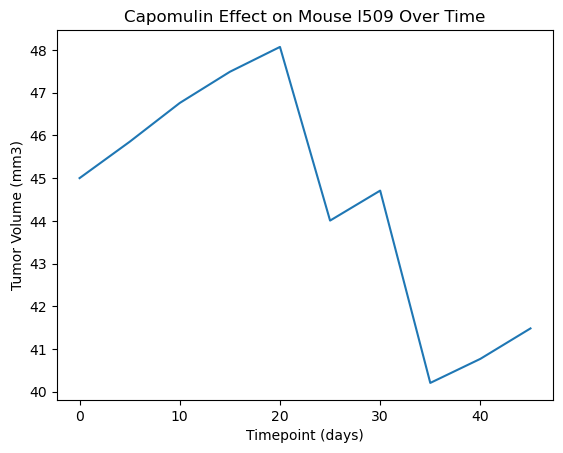

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
l509_df = mouse_df.loc[(mouse_df["Drug Regimen"] == "Capomulin") & (mouse_df["Mouse ID"] == "l509"), :]

plt.plot(l509_df["Timepoint"], l509_df["Tumor Volume (mm3)"])
plt.title("Capomulin Effect on Mouse l509 Over Time")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.show()

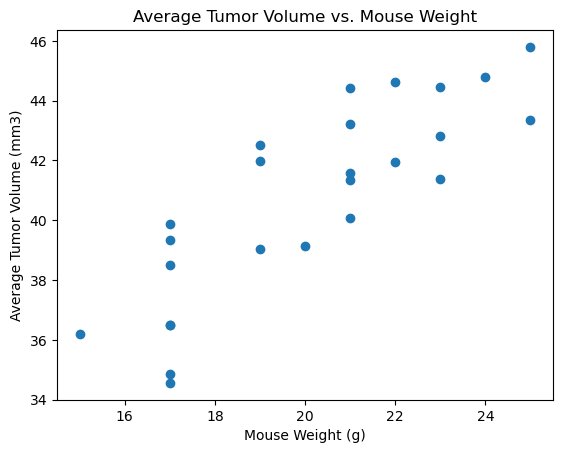

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = mouse_df.loc[(mouse_df["Drug Regimen"] == "Capomulin")]
cap_mean = capomulin_df.groupby("Mouse ID").mean()
mousetumor_avg = cap_mean["Tumor Volume (mm3)"]
mouseweight_avg=cap_mean["Weight (g)"]

# Generate the scatter plot
plt.scatter(mouseweight_avg, mousetumor_avg)
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Mouse Weight (g)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


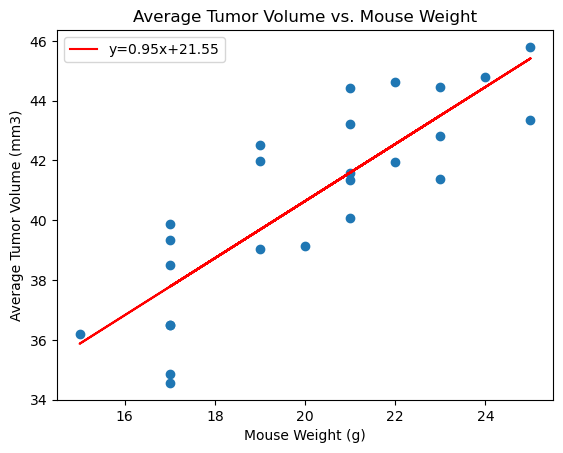

In [18]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = mouseweight_avg
y_values = mousetumor_avg

correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f'The correlation between mouse weight and the average tumor volume is {correlation}')

(slope, intercept, r, p, se) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-", label= "y={:.2f}x+{:.2f}".format(slope,intercept))
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Mouse Weight (g)")
plt.legend()
plt.show()